In this notebook we compare the translational mobility coefficients for a pair of passive spheres for 

 - PyStokes
 - linear solver: FTS Stokesian dynamics (F2s only)
 - linear solver: including all long-ranged traction modes
 
 to the exact solution given by **Ladd**, and also **Batchelor**. 

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt

import pystokes
from linearSolveFTS import linearSolve_direct as linearSolveFTS
from linearSolve import linearSolve_direct as linearSolve

import simTools

In [2]:
PI = 3.14159265359

# particle radius, self-propulsion speed, number and fluid viscosity
b, Np, eta = 1.0, 2, 0.1

## passive particle
D0  = 0.      
S0  = 0.

## normalising factor: one-particle mobility
mu0 = 1./(6*PI*eta*b)

The results are compared at the nine fixed ratios $r/b$, where $r$ is the centre-to-centre distance: $2.0,\, 2.0049,\, 2.0907,\, 2.2553,\, 2.6749,\, 3.0862,\, 4.0,\, 6.0,\, 8.0$

In [3]:
rb = np.array([2.0, 2.0049, 2.0907, 2.2553, 2.6749, 3.0862, 4.0, 6.0, 8.0])

___________

### Exact results (normalised by $\mu_0$)

In [4]:
muPara = np.array([1.5500, 1.5494, 1.5376, 1.5160, 1.4662, 1.4236, 1.3472, 1.2427, 1.1847]) #force parallel to line of centers
muPerp = np.array([1.3799, 1.4027, 1.3933, 1.3648, 1.3029, 1.2586, 1.1950, 1.1273, 1.0947]) #force perpendicular to line of centers

____________

### PyStokes

In [5]:
pstk = pystokes.unbounded.Rbm(b, Np, eta)
## define distances that iterate through rb/2 and forces parallel and perpendicular to these distances 

pstk_muPara = np.zeros(rb.shape[0])
pstk_muPerp = np.zeros(rb.shape[0])


r, F, T, v, o = np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np)

## parallel
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force parallel to separation - along x axis
        F[i]      = 1.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 0.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
    
    pstk.mobilityTT(v,r,F)
    pstk.mobilityTR(v,r,T)
    pstk.mobilityRT(o,r,F)
    pstk.mobilityRR(o,r,T)
        
    pstk_muPara[k] = v[0]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1
    
## perpendicular
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force perpendicular to separation - along z axis
        F[i]      = 0.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 1.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
        
    pstk.mobilityTT(v,r,F)
    pstk.mobilityTR(v,r,T)
    pstk.mobilityRT(o,r,F)
    pstk.mobilityRR(o,r,T)
        
    pstk_muPerp[k] = v[4]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1

In [6]:
pstk_muPara/muPara

array([1.0483871 , 1.04820011, 1.04580903, 1.04084827, 1.02886353,
       1.01996004, 1.00903726, 1.00214885, 1.00071484])

In [7]:
pstk_muPerp/muPerp

array([1.04174216, 1.02383002, 1.01445853, 1.00830671, 1.0027698 ,
       1.00113384, 1.00026151, 1.00001314, 1.00002426])

___________

### FTS linear solver

In [8]:
lsFTS = linearSolveFTS(b, Np, eta)
## define distances that iterate through rb/2 and forces parallel and perpendicular to these distances 

lsFTS_muPara = np.zeros(rb.shape[0])
lsFTS_muPerp = np.zeros(rb.shape[0])


r, F, T, v, o = np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np)

S = np.zeros(5*Np)

## parallel
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force parallel to separation - along x axis
        F[i]      = 1.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 0.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
    
    lsFTS.RBM(v, o, r, F, T, S)
        
    lsFTS_muPara[k] = v[0]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1
    
## perpendicular
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force perpendicular to separation - along z axis
        F[i]      = 0.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 1.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
        
    lsFTS.RBM(v, o, r, F, T, S)
        
    lsFTS_muPerp[k] = v[4]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1

In [9]:
lsFTS_muPara/muPara

array([1.01064516, 1.01056976, 1.0101971 , 1.00934785, 1.00691264,
       1.00480553, 1.00208139, 1.00040843, 1.0001074 ])

In [10]:
lsFTS_muPerp/muPerp

array([1.03706673, 1.019318  , 1.01119299, 1.00648142, 1.00228371,
       1.00097488, 1.00024075, 1.00001229, 1.00002418])

______________

## full linear solver

In [11]:
ls = linearSolve(b, Np, eta)
## define distances that iterate through rb/2 and forces parallel and perpendicular to these distances 

ls_muPara = np.zeros(rb.shape[0])
ls_muPerp = np.zeros(rb.shape[0])


r, F, T, v, o = np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np), np.zeros(3*Np)

S = np.zeros(5*Np)
D = np.zeros(3*Np)

## parallel
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force parallel to separation - along x axis
        F[i]      = 1.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 0.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
    
    ls.RBM(v, o, r, F, T, S, D)
        
    ls_muPara[k] = v[0]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1
    
## perpendicular
k=0
for rb_ in rb:
    #separation in x-direction
    r[0] = -rb_/2.
    r[1] =  rb_/2.
    for i in range(Np):
        #force perpendicular to separation - along z axis
        F[i]      = 0.0
        F[i+Np]   = 0.0 
        F[i+2*Np] = 1.0
        
        v[i]      = 0.0
        v[i+Np]   = 0.0
        v[i+2*Np] = 0.0
        
        o[i]      = 0.0
        o[i+Np]   = 0.0
        o[i+2*Np] = 0.0
        
    ls.RBM(v, o, r, F, T, S, D)
        
    ls_muPerp[k] = v[4]/mu0 ## force is unity, so raw mobility is just velocity. Normalised by one-particle mobility
    k += 1

In [12]:
ls_muPara/muPara

array([1.00723955, 1.00716546, 1.00686149, 1.00632033, 1.00493458,
       1.00361936, 1.00170524, 1.00036241, 1.00009811])

In [13]:
ls_muPerp/muPerp

array([1.0327385 , 1.01512202, 1.00790297, 1.00433452, 1.00144898,
       1.00059564, 1.00015146, 1.00000347, 1.00002252])

________________

## Plotting

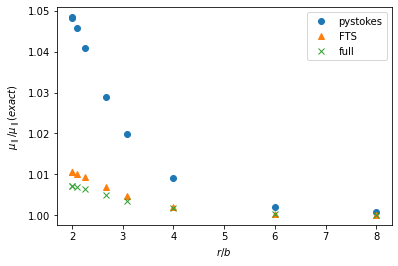

In [14]:
plt.plot(rb, pstk_muPara/muPara, label='pystokes', marker='o', linestyle="None")
plt.plot(rb, lsFTS_muPara/muPara, label='FTS', marker='^', linestyle="None")
plt.plot(rb, ls_muPara/muPara, label='full', marker='x', linestyle="None")
plt.xlabel('$r/b$')
plt.ylabel('$\mu_\parallel/\mu_\parallel(exact)$')
plt.legend()
plt.show()

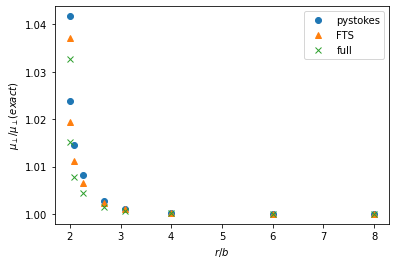

In [15]:
plt.plot(rb, pstk_muPerp/muPerp, label='pystokes', marker='o', linestyle="None")
plt.plot(rb, lsFTS_muPerp/muPerp, label='FTS', marker='^', linestyle="None")
plt.plot(rb, ls_muPerp/muPerp, label='full', marker='x', linestyle="None")
plt.xlabel('$r/b$')
plt.ylabel('$\mu_\perp/\mu_\perp(exact)$')
plt.legend()
plt.show()